In [97]:
%matplotlib inline

import pandas as pd
import textstat as tstat
import matplotlib.pyplot as plt
import numpy as np
# import splitter

In [98]:
# load data
data_path = '../data/'
transcript_data_file = 'transcripts.csv'
data = pd.read_csv(data_path + transcript_data_file)

In [99]:
# check data format
num_transcripts = data.shape[0]
data.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [100]:
# prepare data storage
fk_dict = {}

In [101]:
# Problematic characters in transcripts
char_blacklist = ['♫', '♪']

In [102]:
import re

# Some data processing functions
def url_to_label(url):
    common_string = 'https://www.ted.com/talks/'
    url = url.replace(common_string,'')
    url = url.replace('\n','')
    
    return url

def clean_transcript(text, blacklist):

    # it appears that these 'double notes' indicate ends of musical phrases
    # making determination that this roughly equates to sentences
    text = text.replace('♫♫', '.')
    text = text.replace('♫ ♫', '.')
    text = text.replace('♪♪', '.')
    
    # notice that there still exist single notes, so removing these
    for char in blacklist:
        text = text.replace(char,'')
        
    # remove transcript commentary (e.g. (Laughter))
    # regex removes segments in parentheses
    text = re.sub(r"\([^()]*\)","",text)
    
    # add missing spaces (not perfect, adds spaces in quotations)
    text = re.sub(r'\.(?! )', '. ', re.sub(r' +', ' ', text))
    text = re.sub(r'\!(?! )', '. ', text)
    text = re.sub(r'\?(?! )', '. ', text)
    
    return text

In [103]:
max_valid_score = 15 #temp for now

manual_check_labels = []
manual_check_idx = []

# loop over talks and process transcripts
for index, row in data.iterrows():
    
    if index % 100 == 0:
        print(f'Processing transcript {index} of {num_transcripts}')
    
    #strip the url to get meaningful data key
    label = url_to_label(row['url'])
    
    #preprocess the transcript to remove annotations/special characters
#     tscript = clean_transcript(row['transcript'], char_blacklist)
    row['transcript'] = clean_transcript(row['transcript'], char_blacklist)
    
    #perform text analysis
    grade_score = tstat.flesch_kincaid_grade(row['transcript'])
    
    #transcript checking
#     if label == 'morley_sings_women_of_hope':
#     if label == 'lee_mokobe_a_powerful_poem_about_what_it_feels_like_to_be_transgender':
#     if label == 'ken_robinson_says_schools_kill_creativity':
#         print(row['transcript'])
#         break

    if grade_score > max_valid_score:
        manual_check_labels.append(label)
        manual_check_idx.append(index)
#         print(row['transcript'])
#         break
    
    #handle fused transcipts
#     if grade_score > max_valid_score:
        #use splitter to split up the compound words
    
    #store results to dictionary
    fk_dict.update({label : grade_score})

Processing transcript 0 of 2467
Processing transcript 100 of 2467
Processing transcript 200 of 2467
Processing transcript 300 of 2467
Processing transcript 400 of 2467
Processing transcript 500 of 2467
Processing transcript 600 of 2467
Processing transcript 700 of 2467
Processing transcript 800 of 2467
Processing transcript 900 of 2467
Processing transcript 1000 of 2467
Processing transcript 1100 of 2467
Processing transcript 1200 of 2467
Processing transcript 1300 of 2467
Processing transcript 1400 of 2467
Processing transcript 1500 of 2467
Processing transcript 1600 of 2467
Processing transcript 1700 of 2467
Processing transcript 1800 of 2467
Processing transcript 1900 of 2467
Processing transcript 2000 of 2467
Processing transcript 2100 of 2467
Processing transcript 2200 of 2467
Processing transcript 2300 of 2467
Processing transcript 2400 of 2467


In [104]:
# Check indexes for manual processing
print(manual_check_labels)

['robert_gupta_between_music_and_medicine', 'toni_griffin_a_new_vision_for_rebuilding_detroit', 'jamila_lyiscott_3_ways_to_speak_english', 'glenn_greenwald_why_privacy_matters', 'teitur_home_is_a_song_i_ve_always_remembered', 'silk_road_ensemble_rhiannon_giddens_st_james_infirmary_blues']


In [106]:
# save cleaned transcripts to csv file
data.to_csv('cleaned_transcripts.csv', index=False)

In [82]:
# Get basic stats
grade_scores = list(fk_dict.values())

print(f'Max Score:  {max(grade_scores)}')
print(f'Min Score:  {min(grade_scores)}')
print(f'Mean Score: {np.mean(grade_scores)}')
print(f'Std Score:  {np.std(grade_scores)}')

Max Score:  116.0
Min Score:  -15.7
Mean Score: 7.555762987012987
Std Score:  3.2066311015997653


In [84]:
# Find the max and min vals
max_key = next(key for key, value in fk_dict.items() if value == max(grade_scores))
min_key = next(key for key, value in fk_dict.items() if value == min(grade_scores))

print('Max Score:')
print(max_key)
print()
print('Min Score:')
print(min_key)

Max Score:
jamila_lyiscott_3_ways_to_speak_english

Min Score:
kenichi_ebina_s_magic_moves


In [86]:
# Filter large values for now
grade_scores_filt = [score for score in grade_scores if score <= 50]

Text(0.5,1,'Distribution of Speech Complexity')

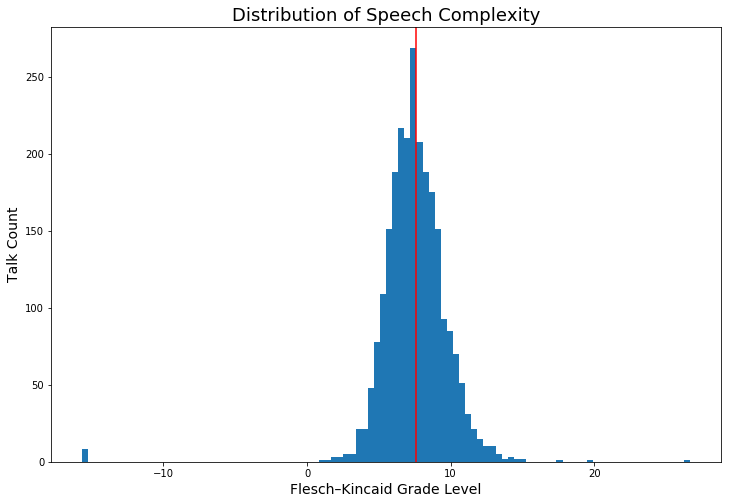

In [87]:
# Visualize the distribution
fig = plt.figure(figsize=(12,8))
fig = plt.hist(grade_scores_filt, 100)
mean_line = plt.axvline(x=np.mean(grade_scores), color='r')
plt.xlabel('Flesch–Kincaid Grade Level', size=14)
plt.ylabel('Talk Count', size=14)
plt.title('Distribution of Speech Complexity', size=18)